# Convolutional Neural Network




In [ ]:
!git clone "https://github.com/NeenuFrancis/friends_multiclass_CNN.git"

Cloning into 'friends_multiclass_CNN'...
remote: Enumerating objects: 176, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 176 (delta 1), reused 0 (delta 0), pack-reused 143
Receiving objects: 100% (176/176), 2.82 MiB | 13.56 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [ ]:

#!git clone https://github.com/NeenuFrancis/friends_multiclass_CNN
#!rm -rf /content/friends_multiclass_CNN

### Importing the libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
tf.__version__

'2.14.0'

# **Part 1 - Data Preprocessing**



### Preprocessing the Training set

In [ ]:
import pandas as pd

In [ ]:
from keras.preprocessing import image
#Creating an object of ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.1)

#Generating batches of Augmented data
training_set = train_datagen.flow_from_directory('/content/friends_multiclass_CNN/Data/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical'
                                                 )

Found 45 images belonging to 5 classes.


### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.1)

test_set = test_datagen.flow_from_directory('/content/friends_multiclass_CNN/Data/Test',
                                             target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical'
                                            )


Found 17 images belonging to 5 classes.


# **Part 2 - Building the CNN**





### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                               input_shape=[64, 64, 3]))


### Step 2 - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

# **Part 3 - Training the CNN**

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
2/2 [==============================] - 14s 1s/step - loss: 1.7319 - accuracy: 0.2222 - val_loss: 1.2417 - val_accuracy: 0.4706
Epoch 2/20
2/2 [==============================] - 0s 237ms/step - loss: 1.3120 - accuracy: 0.2889 - val_loss: 1.3090 - val_accuracy: 0.3529
Epoch 3/20
2/2 [==============================] - 0s 359ms/step - loss: 1.2338 - accuracy: 0.3111 - val_loss: 1.0847 - val_accuracy: 0.6471
Epoch 4/20
2/2 [==============================] - 0s 237ms/step - loss: 1.0982 - accuracy: 0.5778 - val_loss: 0.9126 - val_accuracy: 0.6471
Epoch 5/20
2/2 [==============================] - 0s 244ms/step - loss: 0.9836 - accuracy: 0.6000 - val_loss: 0.7879 - val_accuracy: 0.6471
Epoch 6/20
2/2 [==============================] - 0s 248ms/step - loss: 0.7831 - accuracy: 0.6000 - val_loss: 0.7522 - val_accuracy: 0.7647
Epoch 7/20
2/2 [==============================] - 0s 224ms/step - loss: 0.7506 - accuracy: 0.8000 - val_loss: 0.6501 - val_accuracy: 0.7647
Epoch 8/20
2/2 [======

In [ ]:

import numpy as np
from keras.preprocessing import image

test_image = tf.keras.utils.load_img('/content/friends_multiclass_CNN/Predict_Image/WhatsApp Image 2023-11-01 at 8.58.33 PM.jpeg',
                                     target_size = (64, 64))
#test_image = tf.keras.utils.load_img(test_image)
im=test_image

test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

training_set.class_indices


label=["Benson", "Leena", "Michelle", "Neenu","Sam"]
for i in label:
    if result[0][label.index(i)]==1:
         break



prediction=i


im.show()


1/1 [==============================] - 0s 151ms/step


Michelle


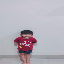

In [ ]:
print(prediction)

display(im)
